In [22]:
import pandas as pd
import folium
import math
from folium.plugins import MarkerCluster,HeatMap
import seaborn as sns

In [23]:
df=pd.read_csv('https://raw.githubusercontent.com/VinitaSilaparasetty/coursera-spatial-data-analysis/master/boston-crime%202.csv')
df.head(3);

In [24]:
boston = (42.358443, -71.05977)
m = folium.Map(location=boston, tile='Stamen terrain', zoom_start=12)
m;

In [25]:
mc = MarkerCluster()
for idx,row in df.iterrows():
    if not math.isnan(row['Long'])and not math.isnan(row['Lat']):
        mc.add_child(folium.Marker([row['Lat'], row['Long']]))
m.add_child(mc);

In [26]:
crime = df.groupby(['DISTRICT', 'STREET', 'REPORTING_AREA', 'Lat', 'Long']).sum().reset_index();

In [27]:
crime.update(crime['DISTRICT'].map('DISTRICT:{}'.format))
crime.update(crime['REPORTING_AREA'].map('Reports:{}'.format));

In [28]:
m2 = folium.Map(location=boston, tiles='stamentoner', zoom_start=12)
HeatMap(data=crime[['Lat', 'Long']], radius=15).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location=[point.Lat,point.Long],
                       radius=5,
                       weight=2,
                       popup=[point.DISTRICT, point.REPORTING_AREA],
                       fill_color='#000000').add_to(m2)
crime.apply(plotDot, axis=1)
m2.fit_bounds(m2.get_bounds())
m2

In [29]:
med = df.loc[df.OFFENSE_CODE_GROUP=='Medical Assistance'][['Lat', 'Long']]
med.Lat.fillna(0, inplace=True)
med.Long.fillna(0,inplace=True)
m6=folium.Map(location=boston,tiles='openstreetmap', zoom_start=12)
HeatMap(data=med, radius=16).add_to(m6)
m6

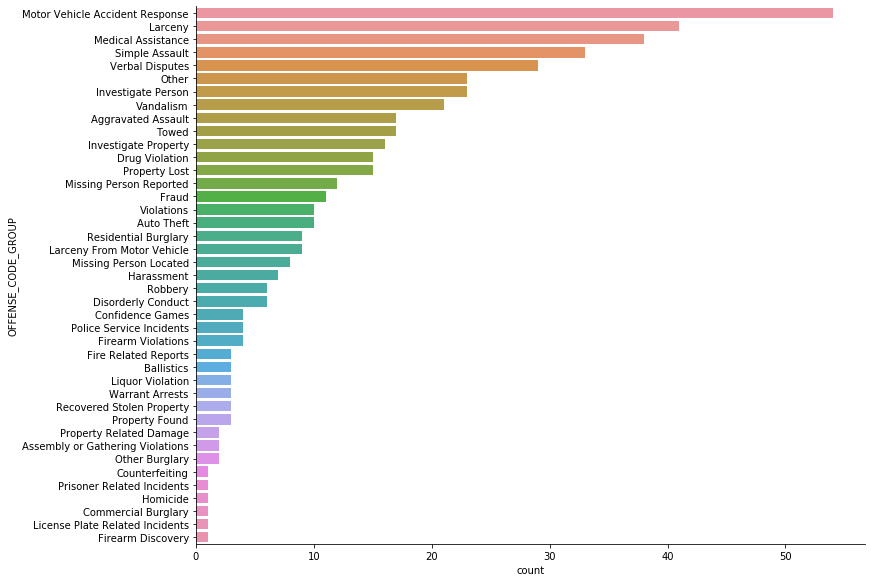

In [30]:
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
           height=8,
           aspect=1.5,
           order=df.OFFENSE_CODE_GROUP.value_counts().index,
           data=df);

In [31]:
mv=df.loc[df.OFFENSE_CODE_GROUP=='Motor Vehicle Accident Response'][['Lat','Long']]
mv.fillna(0, inplace=True)
mv.Lat.fillna(0, inplace=True)
mv.Long.fillna(0,inplace=True)
m4=folium.Map(location=boston, tiles='openstreetmap', zoom_start=11)
HeatMap(data=mv, radius=16).add_to(m4)
m4

In [32]:
lar=df.loc[df.OFFENSE_CODE_GROUP=='Larceny'][['Lat','Long']]
lar.Lat.fillna(0,inplace=True)
lar.Long.fillna(0,inplace=True)
m5=folium.Map(location=boston, tiles='openstreetmap', zoom_start=11)
HeatMap(data=lar,radius=16).add_to(m5)
m5